In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

In [99]:
import random
import math 

class normal:
    def __init__(self, miu, sigma):
        self.a = miu
        self.b = sigma

    def random(self):
        u1 = random.random()
        u2 = random.random()
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        B = v1**2 + v2**2
        while B > 1:
            u1 = random.random()
            u2 = random.random()
            v1 = 2 * u1 - 1
            v2 = 2 * u2 - 1
            B = v1**2 + v2**2
        z1 = math.sqrt(-2 * math.log(B) / B) * v1 * self.b + self.a
        z2 = math.sqrt(-2 * math.log(B) / B) * v2 * self.b + self.a
        return [z1, z2]

    def randoms(self, n):
        v = []
        k = n % 2
        if k == 1:
            for i in range(0, n // 2):
                v.extend(self.random())
            v.append(self.random()[0])
        else:
            for i in range(0, n // 2):
                v.extend(self.random())
        return v

In [114]:

class SDE:
#     params: parametros iniciales en un diccionario
#     s0: valor inicial del proceso
#     mu, sigma: deriva y difución en sympy

    def __init__(self, parametros, s0, mu, sigma):
        self.parametros = parametros
        self.T = T
        self.n = n
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
    
    def euler(self, T, n, n_simulaciones):
        
        dt = T / n
        
        
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            for i in range(1, len(valores)):
                
                si = s0_sim + mu.subs({**parametros, S:s0_sim})*dt + sigma.subs({**parametros, S:s0_sim})*valores[i]*np.sqrt(dt)
                proceso.append(si)
                s0_sim= si
                valores_dt.append(dt*(i+1))
                
            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.grid()
        
        
    def milstein(self, T, n, n_simulaciones):

        dt = T / n
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            for i in range(1, len(valores)):

                si = s0_sim + mu.subs({**parametros, S:s0_sim})*dt + sigma.subs({**parametros, S:s0_sim})*valores[i]*np.sqrt(dt) + 1/2 * sp.diff(sigma, S).subs({**parametros, S:s0_sim}) * sigma.subs({**parametros, S:s0_sim}) * dt * (valores[i]**2 - 1)          
                proceso.append(si)
                s0_sim = si
                valores_dt.append(dt*(i+1))

            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.grid()



In [138]:
a, b, c , S = sp.symbols('a, b, c, S')
mu = (b - a*S)*0
sigma = c
parametros = {a: 2, b: 3, c: 1} 
# s_valores = [1, 2, 3, 4]
# mu_valores = [mu.subs({S: i, **parametros}) for i in s_valores]
# sigma_valores = [sigma.subs({S: i, **parametros}) for i in s_valores]

In [139]:
sims = SDE(parametros, 0, mu, sigma)

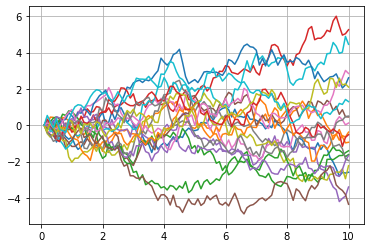

In [140]:
sims.euler(10, 100, 20)

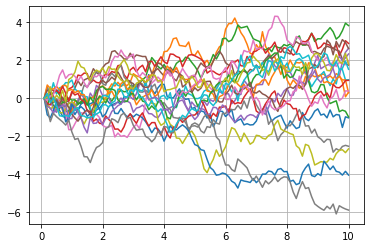

In [141]:
sims.milstein(10, 100, 20)